In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables

base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurment = base.classes.measurement
Station = base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#inspector = inspect(engine)

In [10]:
# Find the most recent date in the data set.
session.query(Measurment.date).order_by(Measurment.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

one_year_time = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_time)

2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
prevyear_data = session.query(Measurment.date,Measurment.prcp).\
    filter(Measurment.date >= '2016-08-23').all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prevyear_df = pd.DataFrame(prevyear_data, columns=['date','precipitation'])

prevyear_ = prevyear_df.set_index('date')

<function matplotlib.pyplot.show(close=None, block=None)>

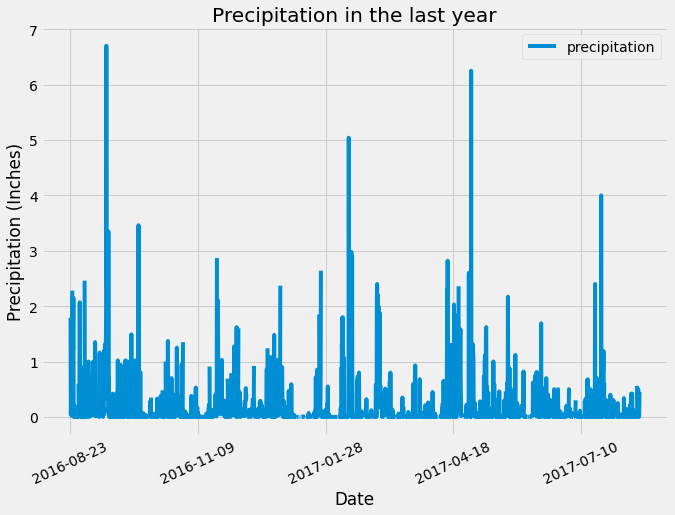

In [22]:
# Sort the dataframe by date
prevyear_sorted = prevyear_.sort_values('date')
#export csv for second part of assignment
prevyear_sorted.to_csv('./previousyear_precipitation.csv')


# Use Pandas Plotting with Matplotlib to plot the data
prevyear_sorted.plot(figsize=(10,7))

#configure plot
plt.title('Precipitation in the last year')
plt.ylabel('Precipitation (Inches)')
plt.xlabel('Date')
plt.xticks(rotation=25)
plt.savefig('./Images/Precipitation_peryear.png')
plt.show

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prevyear_sorted.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.name).count()
station_count

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_data = session.query(Measurment.station, func.count(Measurment.tobs)).\
    group_by(Measurment.station).\
    order_by(func.count(Measurment.tobs).desc()).all()
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#create a list where the columns are joined
sel = [func.min(Measurment.tobs),
      func.max(Measurment.tobs),
      func.avg(Measurment.tobs)]
most_active_info = session.query(*sel).filter(Measurment.station == 'USC00519281').all()

print(f'Lowest Temp.: {most_active_info[0][0]}, Highest Temp.: {most_active_info[0][1]}, Average Temp.: {round((most_active_info[0][2]),2)}')


Lowest Temp.: 54.0, Highest Temp.: 85.0, Average Temp.: 71.66


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#query for the last 12 months
temp_obs = session.query(Measurment.tobs).\
    filter(Measurment.date >= '2016-08-23').\
    filter(Measurment.station == 'USC00519281').all()

#turn into pandas data frame

temp_obs_df = pd.DataFrame(temp_obs, columns = ['Temp_Obs'])

<function matplotlib.pyplot.show(close=None, block=None)>

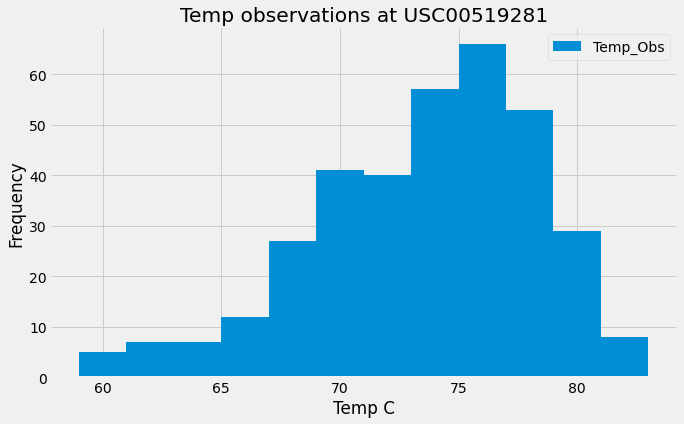

In [20]:
temp_obs_df.plot.hist(bins=12, figsize=(10,6))
plt.title('Temp observations at USC00519281')

plt.xlabel('Temp C')

plt.savefig('./Images/temperature_lastyear.png')
plt.show

# Close session

In [21]:
# Close Session
session.close()